In [1]:
from sklearn.datasets import fetch_openml

In [2]:
# mnist = fetch_openml('mnist_784', version = 1)
# mnist.keys()

In [3]:
import numpy as np
import pandas as pd

In [4]:
mnist = pd.read_csv('train.csv')

In [5]:
mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
mnist.describe

<bound method NDFrame.describe of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

     

In [7]:
mnist.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [8]:
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

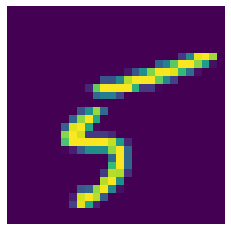

In [9]:
plt.imshow(np.array(mnist.drop('label', axis = 1).loc[22881]).reshape(28, 28))
plt.axis(False)

In [10]:
mnist['label'][22881]

5

In [11]:
X = mnist.drop('label', axis = 1)
y = mnist['label'].copy()

In [12]:
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
y.value_counts()/420

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

In [16]:
x_train_tmp, x_test_tmp, y_train_tmp, y_test_tmp = train_test_split(X, y, test_size = 0.4)
print(x_train_tmp.shape, x_test_tmp.shape, y_train_tmp.shape, y_test_tmp.shape)

(25200, 784) (16800, 784) (25200,) (16800,)


In [17]:
y_train_tmp.value_counts()/252

1    10.892857
3    10.428571
7    10.396825
9    10.230159
0     9.892857
4     9.845238
2     9.833333
6     9.781746
8     9.611111
5     9.087302
Name: label, dtype: float64

In [18]:
y_train_tmp = (y_train_tmp == 5)
y_test_tmp = (y_test_tmp == 5)

In [19]:
spliter = StratifiedShuffleSplit(test_size = 0.4)

for train_index, test_index in spliter.split(X, y):
    strat_train_x, strat_train_y = X.loc[train_index], y.loc[train_index]
    strat_test_x, strat_test_y = X.loc[test_index], y.loc[test_index]

In [20]:
print(strat_train_x.shape, strat_train_y.shape,
      strat_test_x.shape, strat_test_y.shape)

(25200, 784) (25200,) (16800, 784) (16800,)


In [21]:
strat_train_y.value_counts()/252

1    11.150794
7    10.480159
3    10.361111
9     9.972222
2     9.944444
6     9.849206
0     9.837302
4     9.694444
8     9.674603
5     9.035714
Name: label, dtype: float64

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
y_train_5 = (strat_train_y == 5)
y_train_5.head(10)

20034    False
1160      True
32555    False
38570    False
11533    False
8231     False
32047    False
7186     False
3970     False
35105    False
Name: label, dtype: bool

In [24]:
y_test_5 = (strat_test_y == 5)
y_test_5.head(10)

19201    False
38247    False
15227    False
11948    False
41565    False
2992     False
7115     False
4120     False
38211    False
18509    False
Name: label, dtype: bool

In [25]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(strat_train_x, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
sgd_clf.score(strat_test_x, y_test_5)

0.9366071428571429

In [27]:
sdg_clf_2 = SGDClassifier(random_state = 42)
sdg_clf_2.fit(x_train_tmp, y_train_tmp)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
sdg_clf_2.score(x_test_tmp, y_test_tmp)

0.9680952380952381

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import SGDClassifier

In [30]:
sgd_clf = SGDClassifier(random_state = 42)

In [31]:
skfolds = StratifiedKFold(n_splits = 3, random_state = 42)

In [32]:
y_5 = (y == 5)
y_5.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
Name: label, dtype: bool

In [33]:
for train_index, test_index in skfolds.split(strat_train_x, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X.loc[train_index]
    y_train_folds = y_5.loc[train_index]
    X_test_folds = X.loc[test_index]
    y_test_folds = y_5.loc[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.963452380952381
0.9658333333333333
0.9230952380952381


In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cross_val_score(sgd_clf, strat_train_x, y_train_5, cv = 3, scoring = 'accuracy')

array([0.96321429, 0.94738095, 0.92714286])

In [36]:
from sklearn.base import BaseEstimator

In [37]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [38]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, strat_train_x, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91095238, 0.90666667, 0.91130952])

That's right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.

This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

In [39]:
never_5_clf = Never5Classifier()

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [41]:
spliter = StratifiedKFold(n_splits = 3)

In [42]:
for train_index, test_index in spliter.split(strat_train_x, y_train_5):
    clone_clf = clone(never_5_clf)
    X_train_folds = X.loc[train_index]
    y_train_folds = y_5.loc[train_index]
    X_test_folds = X.loc[test_index]
    y_test_folds = y_5.loc[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    predicted = clone_clf.predict(X_test_folds)
    n_correct = sum(predicted.ravel() == y_test_folds)
    print(n_correct/len(predicted))

0.9101190476190476
0.9082142857142858
0.9104761904761904


In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
sgd_clf = SGDClassifier()

In [45]:
from sklearn.model_selection import cross_val_predict

In [46]:
y_train_pred = cross_val_predict(sgd_clf, strat_train_x, y_train_5, cv = 3)
y_train_pred

array([False,  True, False, ..., False, False, False])

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_train_5, y_train_pred)

array([[22637,   286],
       [  672,  1605]], dtype=int64)

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
precision_score(y_train_5, y_train_pred)

0.8487572712850344

In [51]:
recall_score(y_train_5, y_train_pred)

0.7048748353096179

In [52]:
from sklearn.metrics import f1_score

In [53]:
f1_score(y_train_5, y_train_pred)

0.7701535508637236

In [54]:
i = 0
while True:
    try:
        some_digit = x_test_tmp.loc[i]
        some_label = y_test_tmp.loc[i]
        break
    except:
        i += 1;

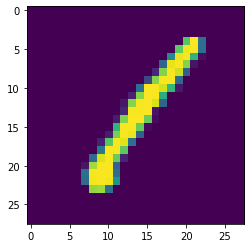

In [55]:
plt.imshow(some_digit.values.reshape(28, 28))

In [56]:
some_label

False

In [57]:
from sklearn.linear_model import SGDClassifier

In [58]:
sgd_clf = SGDClassifier()
sgd_clf.fit(strat_train_x, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
y_score = sgd_clf.decision_function([some_digit])
y_score

array([-5898.24197523])

In [60]:
i = 0
while True:
    try:
        some_digit = x_test_tmp.loc[i]
        some_label = y_test_tmp.loc[i]
        
        if some_label == True:
            break
        else:
            i += 1
    except:
        i += 1
        continue

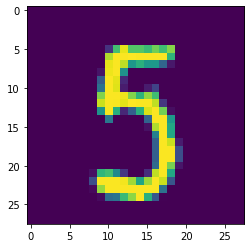

In [61]:
plt.imshow(some_digit.values.reshape(28, 28))

In [62]:
some_label

True

In [63]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([9982.20130246])

In [64]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [65]:
threshold = 10000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents a 5, and the classifier detects it when the thresold is 0, but it misses it when the threshold is increased to 10000.

In [66]:
from sklearn.model_selection import cross_val_predict

In [67]:
y_scores = cross_val_predict(sgd_clf, strat_train_x, y_train_5,
                            cv = 3, method = 'decision_function')

In [68]:
y_scores

array([-22650.26835577,  -2436.67894649, -35444.87714425, ...,
       -81222.63781107, -35640.87331496, -24802.17416883])

In [69]:
from sklearn.metrics import precision_recall_curve

In [70]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [71]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize = (12, 7))
    plt.grid(True)
    plt.plot(thresholds, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend()

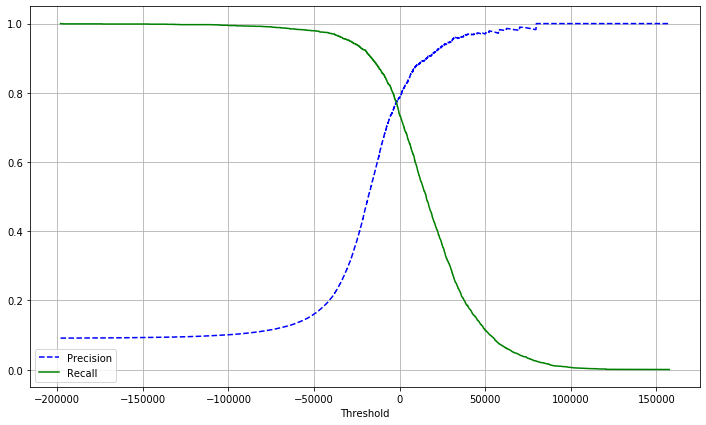

In [72]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

Text(0, 0.5, 'Precision')

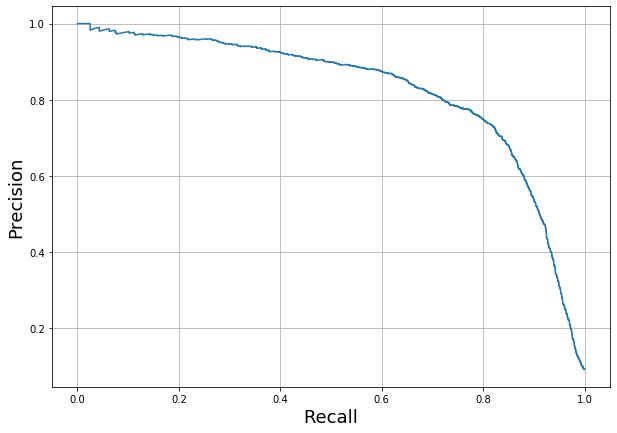

In [73]:
plt.figure(figsize = (10, 7))
plt.grid(True)
plt.plot(recalls, precisions)
plt.xlabel("Recall", fontsize = 18)
plt.ylabel("Precision", fontsize = 18)

Lest's suppose you decide to aim for 90% precision. You look up the first plot and find that you need to use a threshold of about 8000. To be more precise you can search for the lowest threshold that gives you at least 90% precision (np.argmax() will give us the first index of the maximum value, which in this case means the first True value):

In [74]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [75]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [76]:
precision_score(y_train_5, y_train_pred_90)

0.9004815409309791

In [77]:
recall_score(y_train_5, y_train_pred_90)

0.4927536231884058

In [78]:
from sklearn.metrics import roc_curve

In [80]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [88]:
def plot_roc_curve(fpt, tpr, label = None):
    plt.figure(figsize = (10, 7))
    plt.grid(True)
    plt.plot(fpt, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], 'k--')
    plt.xlabel("False positive rate", fontsize = 18)
    plt.ylabel("True positive rate", fontsize = 18)

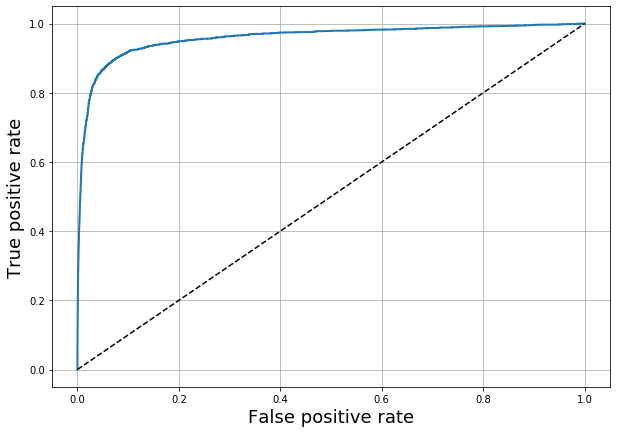

In [89]:
plot_roc_curve(fpr, tpr)